# Running Experiments
> A quick walkthrough on running experiments as designed in this library.

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#hide
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [ ]:
from lemonade.experiment import *

In [ ]:
preprocess_ehr_dataset(PATH_10K, SYNTHEA_DATAGEN_DATES['10K'], from_raw_data=True)

------------------- Splitting and cleaning raw dataset -------------------
Splits:: train: 0.6, valid: 0.2, test: 0.2
Split patients into:: Train: 6645, Valid: 2215, Test: 2216 -- Total before split: 11076
Saved train data to datasets/synthea/10K/raw_split/train
Saved valid data to datasets/synthea/10K/raw_split/valid
Saved test data to datasets/synthea/10K/raw_split/test
Saved cleaned "train" data to datasets/synthea/10K/cleaned/train
Saved vocab code tables to datasets/synthea/10K/cleaned/train/codes
Saved cleaned "valid" data to datasets/synthea/10K/cleaned/valid
Saved cleaned "test" data to datasets/synthea/10K/cleaned/test
------------------- Creating vocab lists -------------------
Saved vocab lists to datasets/synthea/10K/processed
------------------- Creating patient lists -------------------
6645 total patients completed, saved patient list to datasets/synthea/10K/processed/years_0_to_20/train
2215 total patients completed, saved patient list to datasets/synthea/10K/processed/

LSTM

In [ ]:
ddd_20K = Experiment.create_from_file('./experiments', 'ddd_lstm_20K')

In [ ]:
ddd_20K 

Experiment name: ddd_lstm_20K
Description: Deep Double on LSTM (no BN, no dropout) + data (10K data - 0 to 20 yrs)
Path: experiments/ddd_lstm_20K
Labels: ['diabetes', 'stroke', 'alzheimers', 'coronaryheart']
Dataset: ./datasets/synthea/10K
Model: LSTM
Optim: Adagrad

epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
    0 |         20.717 | [0.633 0.772 0.852 0.658]              0.916 | [0.745 0.850 0.958 0.791]
    1 |          0.847 | [0.746 0.883 0.948 0.793]              0.913 | [0.742 0.850 0.957 0.782]
    2 |          0.772 | [0.795 0.901 0.960 0.819]              0.984 | [0.741 0.843 0.954 0.775]
    3 |          0.719 | [0.821 0.916 0.964 0.832]              1.138 | [0.748 0.840 0.957 0.768]
    4 |          0.663 | [0.854 0.923 0.973 0.846]              0.961 | [0.752 0.845 0.953 0.771]
    5 |          0.555 | [0.881 0.953 0.979 0.911]              1.225 | [0.731 0.829 0.954 0.746]
    6 |          0.500 | [0.926 0.964 0.974 0.922]              1.887 | [0.754 0.835 0.949 0.748]
    7 |          0.384 | [0.941 0.977 0.985 0.962]              2.187 | [0.747 0.831 0.948 0.740]
    8 |          0.269

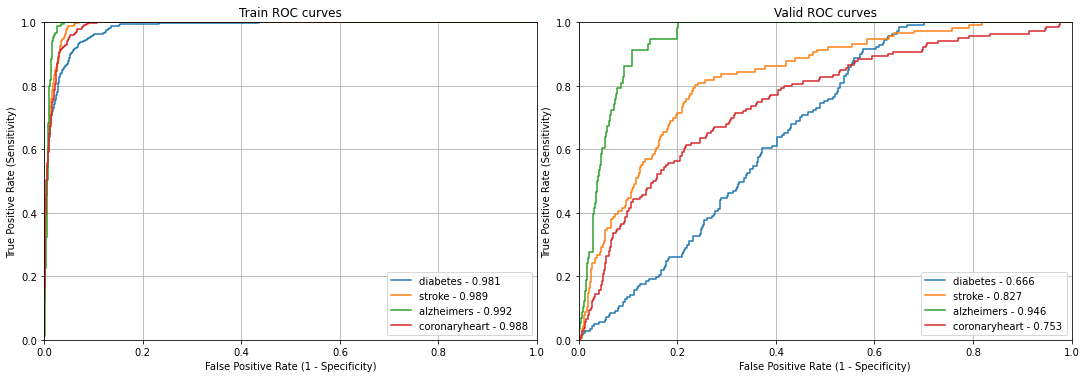

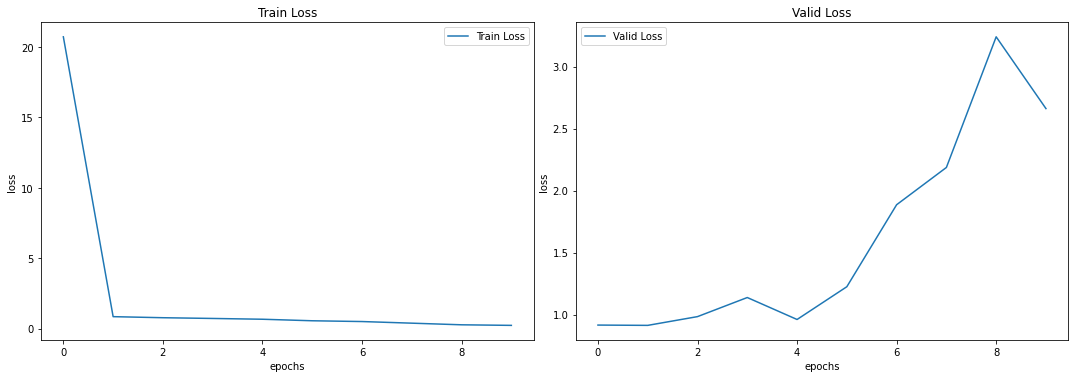

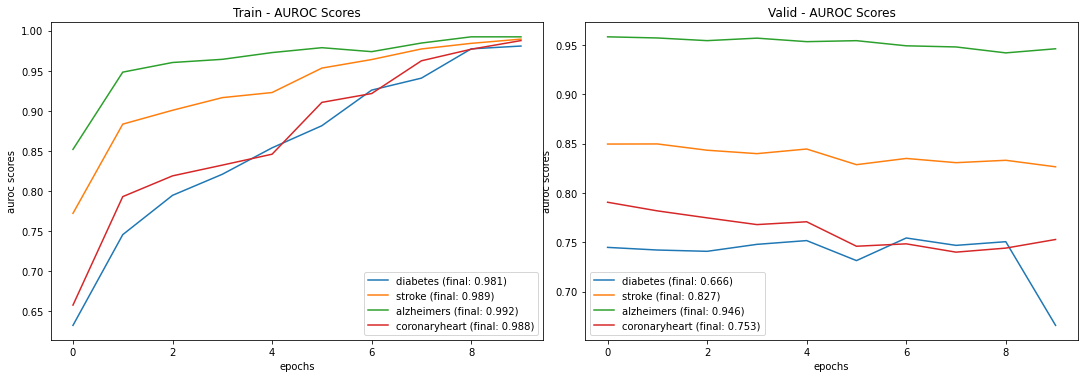

In [ ]:
ddd_20K.fit(10, verbosity=1)

From "models/ddd_lstm_20K/checkpoint.tar", loading model ...
loading optimizer and epoch_index ...
epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
   10 |          0.205 | [0.979 0.992 0.996 0.991]              3.569 | [0.750 0.823 0.935 0.743]
   12 |          0.097 | [0.999 0.997 0.997 0.997]              5.447 | [0.755 0.828 0.935 0.742]
   14 |          0.054 | [1.000 0.999 0.998 0.999]              6.750 | [0.754 0.820 0.933 0.741]
Checkpointed to "models/ddd_lstm_20K/checkpoint.tar"
Saved experiment to experiments/ddd_lstm_20K/ddd_lstm_20K.experiment


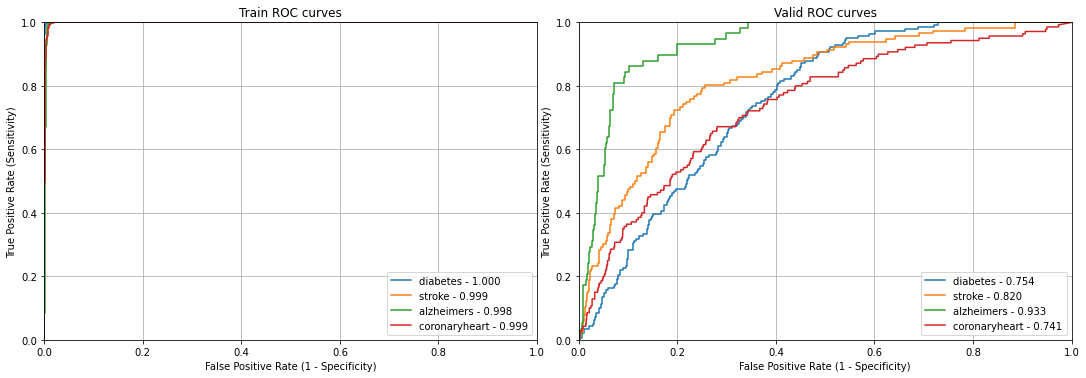

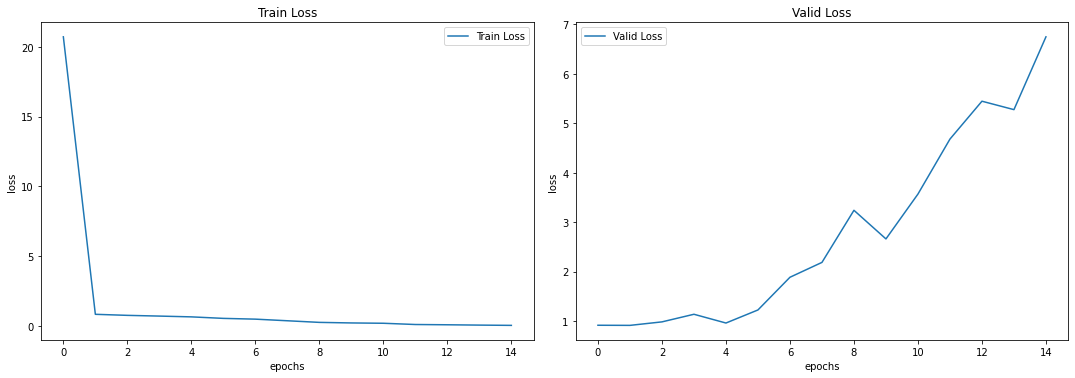

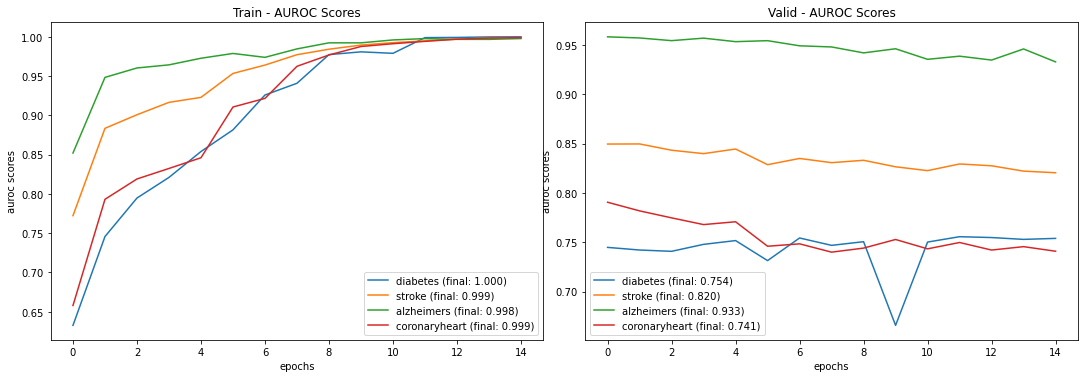

In [ ]:
ddd_20K.fit(5, from_checkpoint=True)

From "models/ddd_lstm_20K/checkpoint.tar", loading model ...
test loss = 7.018989372253418
test aurocs = [0.714044 0.829165 0.901094 0.723976]

Prediction Summary ...
               auroc_score  optimal_threshold     auroc_95_ci
diabetes          0.714044           0.000035  (0.682, 0.747)
stroke            0.829165           0.000032  (0.798, 0.859)
alzheimers        0.901094           0.000012   (0.862, 0.93)
coronaryheart     0.723976           0.000978  (0.677, 0.767)
Saved experiment to experiments/ddd_lstm_20K/ddd_lstm_20K.experiment


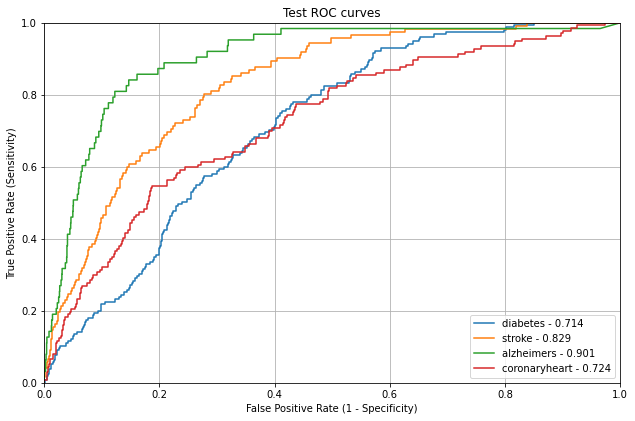

In [ ]:
ddd_20K.predict()

CNN

In [ ]:
ddd_20K = Experiment.create_from_file('./experiments', 'ddd_cnn_20K')

In [ ]:
ddd_20K

Experiment name: ddd_cnn_20K
Description: Deep Double on CNN (no BN, no dropout) + data (10K data - 0 to 20 yrs)
Path: experiments/ddd_cnn_20K
Labels: ['diabetes', 'stroke', 'alzheimers', 'coronaryheart']
Dataset: ./datasets/synthea/10K
Model: CNN
Optim: Adagrad

epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
    0 |         11.168 | [0.678 0.780 0.852 0.715]              0.916 | [0.775 0.857 0.963 0.797]
    1 |          0.826 | [0.765 0.892 0.947 0.810]              0.921 | [0.760 0.856 0.963 0.796]
    2 |          0.736 | [0.810 0.904 0.962 0.847]              0.913 | [0.760 0.858 0.961 0.788]
    3 |          0.623 | [0.854 0.922 0.971 0.903]              1.211 | [0.754 0.854 0.952 0.756]
    4 |          0.536 | [0.865 0.940 0.980 0.945]              1.664 | [0.739 0.845 0.944 0.754]
    5 |          0.451 | [0.929 0.958 0.981 0.951]              1.762 | [0.746 0.846 0.951 0.763]
    6 |          0.326 | [0.958 0.971 0.990 0.984]              1.750 | [0.751 0.846 0.949 0.733]
    7 |          0.234 | [0.977 0.984 0.993 0.995]              3.129 | [0.741 0.839 0.935 0.729]
    8 |          0.182

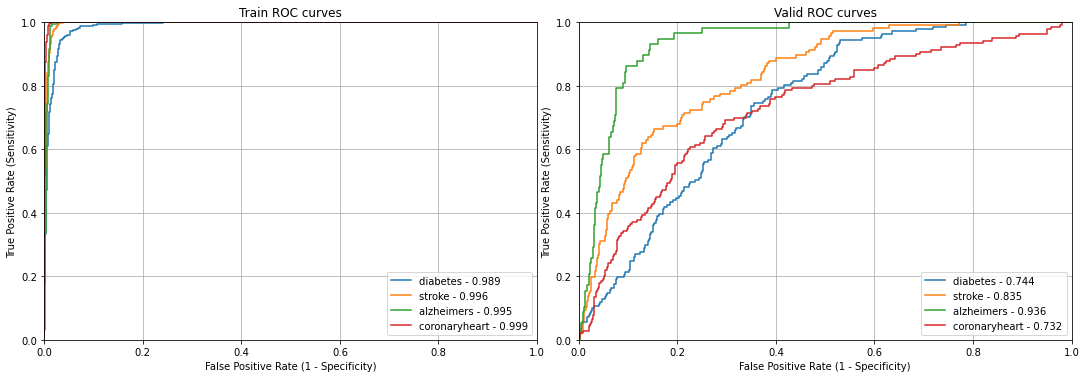

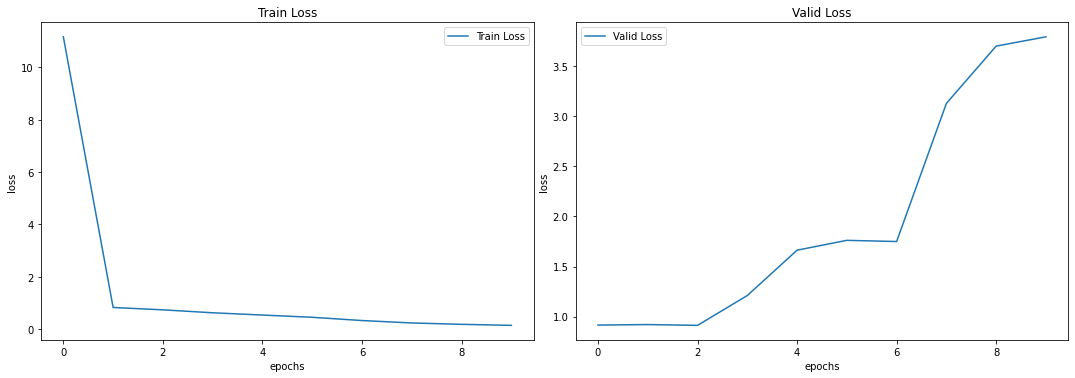

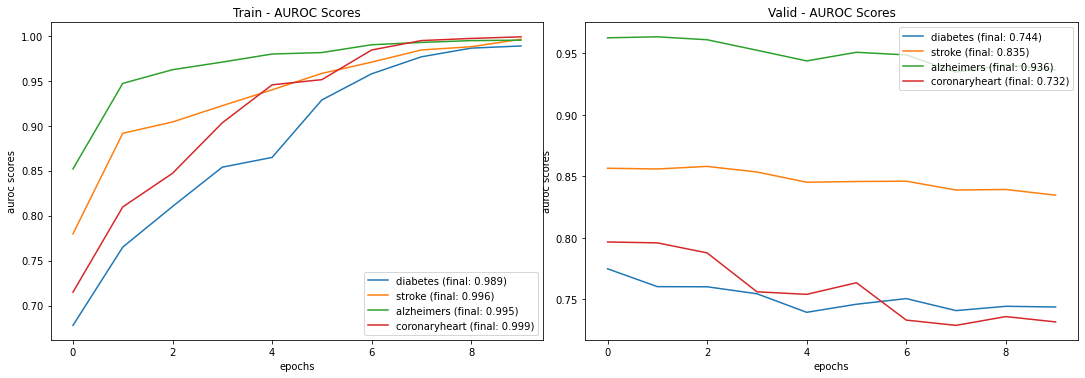

In [ ]:
ddd_20K.fit(10, verbosity=1)

From "models/ddd_cnn_20K/checkpoint.tar", loading model ...
loading optimizer and epoch_index ...
epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
   10 |          0.076 | [1.000 0.997 0.998 1.000]              5.336 | [0.743 0.837 0.925 0.722]
   12 |          0.031 | [1.000 0.999 0.999 1.000]              6.337 | [0.738 0.822 0.920 0.718]
   14 |          0.013 | [1.000 1.000 1.000 1.000]              7.431 | [0.737 0.820 0.911 0.716]
Checkpointed to "models/ddd_cnn_20K/checkpoint.tar"
Saved experiment to experiments/ddd_cnn_20K/ddd_cnn_20K.experiment


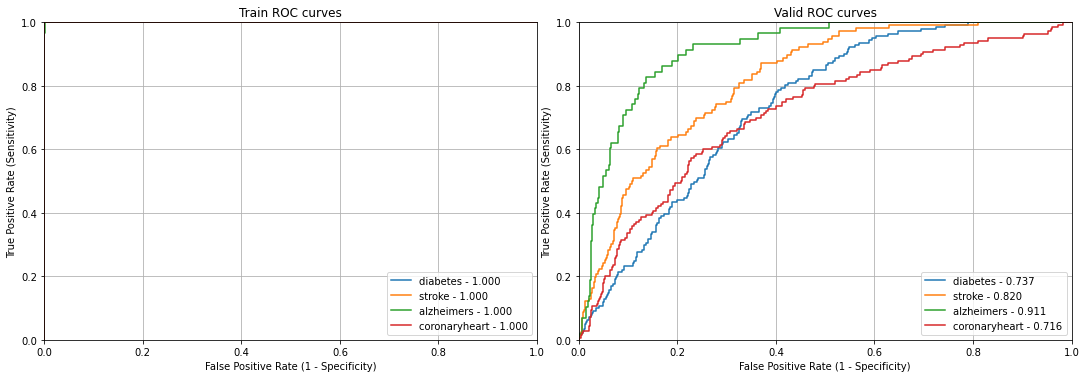

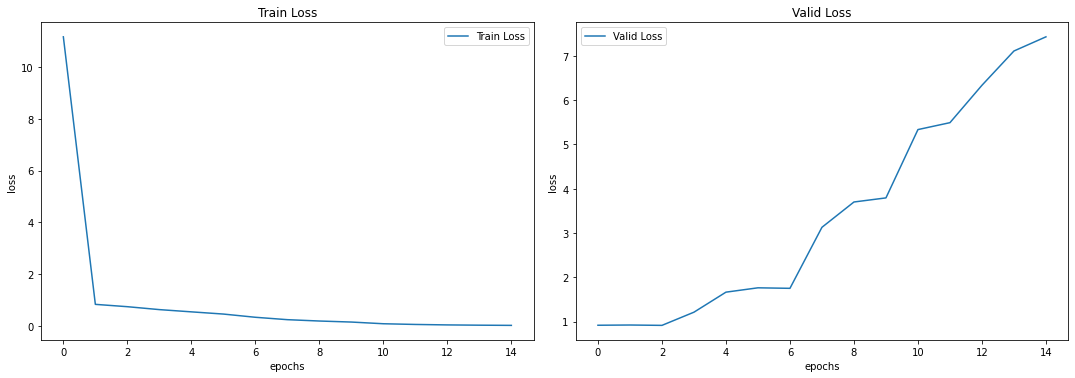

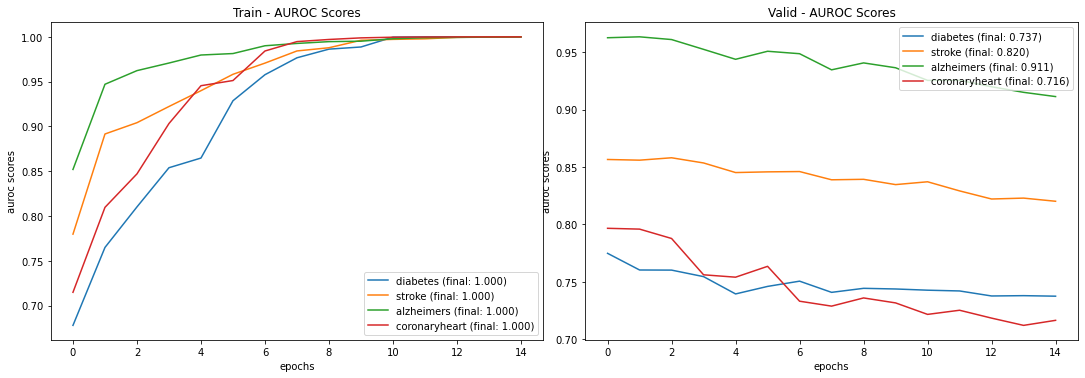

In [ ]:
ddd_20K.fit(5, from_checkpoint=True)

From "models/ddd_cnn_20K/checkpoint.tar", loading model ...
test loss = 6.6170580863952635
test aurocs = [0.696821 0.815124 0.905411 0.75727 ]

Prediction Summary ...
               auroc_score  optimal_threshold     auroc_95_ci
diabetes          0.696821           0.000027  (0.664, 0.732)
stroke            0.815124           0.000060  (0.783, 0.847)
alzheimers        0.905411           0.000032  (0.871, 0.935)
coronaryheart     0.757270           0.000094  (0.715, 0.796)
Saved experiment to experiments/ddd_cnn_20K/ddd_cnn_20K.experiment


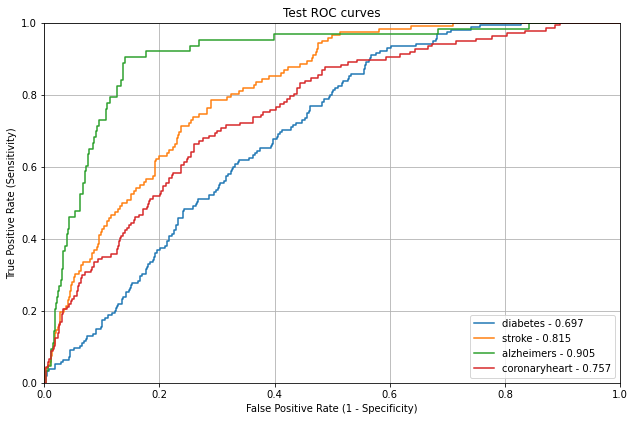

In [ ]:
ddd_20K.predict()